In [356]:
## supress warnings
import warnings
warnings.filterwarnings('ignore')

<font size ='4'> 
Importing necessary libraries 
<font/>

In [357]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<font size ='4'> 
Importing our dataset
<font/>

In [358]:
df = pd.read_csv(r"C:\Users\Gaurav\Downloads\FlightPrice.csv")

In [359]:
df.head(4)

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794


Let's Deal with Missing Values.

In [360]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_of_journey    452088 non-null  object 
 1   Journey_day        452088 non-null  object 
 2   Airline            452088 non-null  object 
 3   Flight_code        452088 non-null  object 
 4   Class              452088 non-null  object 
 5   Source             452088 non-null  object 
 6   Departure          452088 non-null  object 
 7   Total_stops        452088 non-null  object 
 8   Arrival            452088 non-null  object 
 9   Destination        452088 non-null  object 
 10  Duration_in_hours  452088 non-null  float64
 11  Days_left          452088 non-null  int64  
 12  Fare               452088 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 44.8+ MB


In [361]:
df.isnull().sum()

Date_of_journey      0
Journey_day          0
Airline              0
Flight_code          0
Class                0
Source               0
Departure            0
Total_stops          0
Arrival              0
Destination          0
Duration_in_hours    0
Days_left            0
Fare                 0
dtype: int64

In [362]:
df.dtypes

Date_of_journey       object
Journey_day           object
Airline               object
Flight_code           object
Class                 object
Source                object
Departure             object
Total_stops           object
Arrival               object
Destination           object
Duration_in_hours    float64
Days_left              int64
Fare                   int64
dtype: object

In [363]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_of_journey    452088 non-null  object 
 1   Journey_day        452088 non-null  object 
 2   Airline            452088 non-null  object 
 3   Flight_code        452088 non-null  object 
 4   Class              452088 non-null  object 
 5   Source             452088 non-null  object 
 6   Departure          452088 non-null  object 
 7   Total_stops        452088 non-null  object 
 8   Arrival            452088 non-null  object 
 9   Destination        452088 non-null  object 
 10  Duration_in_hours  452088 non-null  float64
 11  Days_left          452088 non-null  int64  
 12  Fare               452088 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 291.7 MB


# Lets Perform Data Pre-process & extract Derived attributes from "Date_of_Journey"

In [364]:
df.columns

Index(['Date_of_journey', 'Journey_day', 'Airline', 'Flight_code', 'Class',
       'Source', 'Departure', 'Total_stops', 'Arrival', 'Destination',
       'Duration_in_hours', 'Days_left', 'Fare'],
      dtype='object')

lets extract derived attributes from "Date_of_Journey" & fetch day , month , year !

In [365]:
data = df.copy()

In [366]:
data.columns

Index(['Date_of_journey', 'Journey_day', 'Airline', 'Flight_code', 'Class',
       'Source', 'Departure', 'Total_stops', 'Arrival', 'Destination',
       'Duration_in_hours', 'Days_left', 'Fare'],
      dtype='object')

In [367]:
data.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955


In [368]:
data.dtypes

Date_of_journey       object
Journey_day           object
Airline               object
Flight_code           object
Class                 object
Source                object
Departure             object
Total_stops           object
Arrival               object
Destination           object
Duration_in_hours    float64
Days_left              int64
Fare                   int64
dtype: object

# From description we can see that Date_of_Journey is a object data type,
 Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction,bcz our 
 model will not be able to understand these string values,it just understand Time-stamp
For this we require pandas to_datetime to convert object data type to datetime dtype.

In [369]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [370]:
data.columns

Index(['Date_of_journey', 'Journey_day', 'Airline', 'Flight_code', 'Class',
       'Source', 'Departure', 'Total_stops', 'Arrival', 'Destination',
       'Duration_in_hours', 'Days_left', 'Fare'],
      dtype='object')

In [371]:
for feature in ['Date_of_journey']:
    change_into_Datetime(feature)

In [372]:
data.dtypes

Date_of_journey      datetime64[ns]
Journey_day                  object
Airline                      object
Flight_code                  object
Class                        object
Source                       object
Departure                    object
Total_stops                  object
Arrival                      object
Destination                  object
Duration_in_hours           float64
Days_left                     int64
Fare                          int64
dtype: object

# lets do Feature Engineering of "Date_of_Journey" & fetch day,month,year !

In [373]:
data["Journey_day"] = data['Date_of_journey'].dt.day

data["Journey_month"] = data['Date_of_journey'].dt.month

data["Journey_year"] = data['Date_of_journey'].dt.year

In [374]:
data.head(3)

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Journey_month,Journey_year
0,2023-01-16,16,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335,1,2023
1,2023-01-16,16,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899,1,2023
2,2023-01-16,16,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801,1,2023


In [375]:
data.shape

(452088, 15)

In [376]:
data['Date_of_journey'].min()

Timestamp('2023-01-16 00:00:00')

In [377]:
data['Date_of_journey'].max()

Timestamp('2023-03-06 00:00:00')

In [378]:
### it means our data belongs to 2023 year only, hence extracting year feature & consider this as a input to my machine learning model makes no sense !
### but if we have more than 1 year  , then of-course it may impact !

In [379]:
data['Departure'].value_counts()

Departure
6 AM - 12 PM    184980
After 6 PM      127969
12 PM - 6 PM    115774
Before 6 AM      23365
Name: count, dtype: int64

In [380]:
data['Departure'] = data['Departure'].replace({
    'After 6 PM': '6 PM - 12 AM',
    'Before 6 AM': '12 AM - 6 AM'
})

In [381]:
data['Arrival'] = data['Arrival'].replace({
    'After 6 PM': '6 PM - 12 AM',
    'Before 6 AM': '12 AM - 6 AM'
})

In [382]:
data['Departure'].value_counts()

Departure
6 AM - 12 PM    184980
6 PM - 12 AM    127969
12 PM - 6 PM    115774
12 AM - 6 AM     23365
Name: count, dtype: int64

In [383]:
data['Arrival'].value_counts()

Arrival
6 PM - 12 AM    200266
6 AM - 12 PM    119644
12 PM - 6 PM    101413
12 AM - 6 AM     30765
Name: count, dtype: int64

# lets analyse when will most of the flights will take-off and arrive

In [384]:
data.columns

Index(['Date_of_journey', 'Journey_day', 'Airline', 'Flight_code', 'Class',
       'Source', 'Departure', 'Total_stops', 'Arrival', 'Destination',
       'Duration_in_hours', 'Days_left', 'Fare', 'Journey_month',
       'Journey_year'],
      dtype='object')

In [385]:
def convert_departure_time(departure):
    if departure in ['12 AM - 6 AM']:
        return 'mid_night'
    elif departure in ['6 AM - 12 PM']:
        return 'morning'
    elif departure in ['12 PM - 6 PM']:
        return 'afternoon'
    elif departure in ['6 PM - 12 AM']:
        return 'evening'
    else:
        return 'unknown'


In [386]:
def convert_arrival_time(arrival):
    if arrival in ['12 AM - 6 AM']:
        return 'mid_night'
    elif arrival in ['6 AM - 12 PM']:
        return 'morning'
    elif arrival in ['12 PM - 6 PM']:
        return 'afternoon'
    elif arrival in ['6 PM - 12 AM']:
        return 'evening'
    else:
        return 'unknown'

In [387]:
data['Departure'] = data['Departure'].apply(convert_departure_time)


In [388]:
data['Arrival'] = data['Arrival'].apply(convert_departure_time)

In [389]:
data['Arrival'].unique()

array(['evening', 'mid_night', 'morning', 'afternoon'], dtype=object)

In [390]:
data['Departure'].unique()

array(['evening', 'mid_night', 'afternoon', 'morning'], dtype=object)

<Axes: xlabel='Departure'>

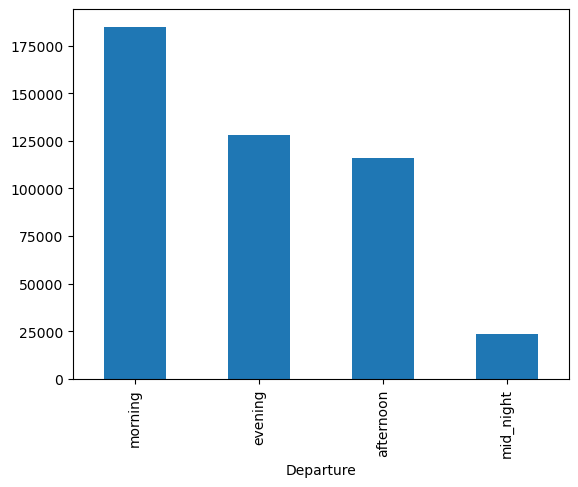

In [391]:
data['Departure'].value_counts().plot(kind='bar')

<Axes: xlabel='Arrival'>

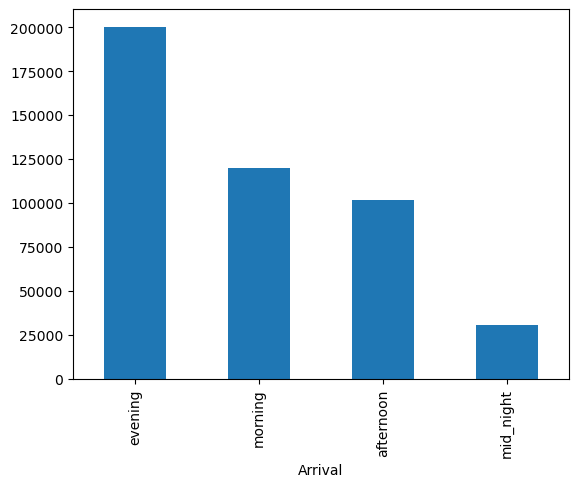

In [392]:
data['Arrival'].value_counts().plot(kind='bar')

In [393]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot , iplot , init_notebook_mode , download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()

In [394]:
data['Departure'].value_counts().iplot(kind='bar')

In [395]:
data['Arrival'].value_counts().iplot(kind='bar')

# One-Hot encoded Departure and Arrival time_category

In [396]:
def encode_time_category(time_category):
    if time_category == 'morning':
        return 1
    elif time_category == 'afternoon':
        return 2
    elif time_category == 'evening':
        return 3
    elif time_category == 'mid_night':
        return 4
    else:
        raise ValueError("Invalid time category")

In [397]:
data['Departure'] = data['Departure'].apply(encode_time_category)

In [398]:
data['Arrival'] = data['Arrival'].apply(encode_time_category)

In [399]:
data['Arrival']

0         3
1         4
2         4
3         3
4         3
         ..
452083    3
452084    2
452085    2
452086    3
452087    3
Name: Arrival, Length: 452088, dtype: int64

In [400]:
data['Departure']

0         3
1         3
2         3
3         3
4         3
         ..
452083    1
452084    4
452085    4
452086    1
452087    1
Name: Departure, Length: 452088, dtype: int64

In [401]:
data.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Journey_month,Journey_year
0,2023-01-16,16,SpiceJet,SG-8169,Economy,Delhi,3,non-stop,3,Mumbai,2.0833,1,5335,1,2023
1,2023-01-16,16,Indigo,6E-2519,Economy,Delhi,3,non-stop,4,Mumbai,2.3333,1,5899,1,2023
2,2023-01-16,16,GO FIRST,G8-354,Economy,Delhi,3,non-stop,4,Mumbai,2.1667,1,5801,1,2023
3,2023-01-16,16,SpiceJet,SG-8709,Economy,Delhi,3,non-stop,3,Mumbai,2.0833,1,5794,1,2023
4,2023-01-16,16,Air India,AI-805,Economy,Delhi,3,non-stop,3,Mumbai,2.1667,1,5955,1,2023


# Pre-process Duration Feature & extract meaningful features from it.

In [402]:
data.columns

Index(['Date_of_journey', 'Journey_day', 'Airline', 'Flight_code', 'Class',
       'Source', 'Departure', 'Total_stops', 'Arrival', 'Destination',
       'Duration_in_hours', 'Days_left', 'Fare', 'Journey_month',
       'Journey_year'],
      dtype='object')

In [403]:
def convert_duration(Duration_in_hours):
    hours = int(Duration_in_hours)
    minutes = int((Duration_in_hours - hours) * 60)
    return f"{hours}h {minutes}m"

In [404]:
data['Duration_in_hours'] = data['Duration_in_hours'].apply(convert_duration)

In [405]:
data['Duration_in_hours']

0           2h 4m
1          2h 19m
2          2h 10m
3           2h 4m
4          2h 10m
           ...   
452083     13h 4m
452084    11h 15m
452085    11h 15m
452086    11h 10m
452087    11h 10m
Name: Duration_in_hours, Length: 452088, dtype: object

In [406]:
data

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Journey_month,Journey_year
0,2023-01-16,16,SpiceJet,SG-8169,Economy,Delhi,3,non-stop,3,Mumbai,2h 4m,1,5335,1,2023
1,2023-01-16,16,Indigo,6E-2519,Economy,Delhi,3,non-stop,4,Mumbai,2h 19m,1,5899,1,2023
2,2023-01-16,16,GO FIRST,G8-354,Economy,Delhi,3,non-stop,4,Mumbai,2h 10m,1,5801,1,2023
3,2023-01-16,16,SpiceJet,SG-8709,Economy,Delhi,3,non-stop,3,Mumbai,2h 4m,1,5794,1,2023
4,2023-01-16,16,Air India,AI-805,Economy,Delhi,3,non-stop,3,Mumbai,2h 10m,1,5955,1,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452083,2023-03-06,6,Vistara,UK-926,Business,Ahmedabad,1,1-stop,3,Chennai,13h 4m,50,65028,3,2023
452084,2023-03-06,6,Vistara,UK-918,Business,Ahmedabad,4,1-stop,2,Chennai,11h 15m,50,69254,3,2023
452085,2023-03-06,6,Vistara,UK-918,Business,Ahmedabad,4,1-stop,2,Chennai,11h 15m,50,69254,3,2023
452086,2023-03-06,6,Vistara,UK-946,Business,Ahmedabad,1,1-stop,3,Chennai,11h 10m,50,72980,3,2023


# Lets Apply pre-processing on duration column,
-->> Once we pre-processed our Duration feature , lets extract Duration hours and minute from duration..

-->> As my ML model is not able to understand this duration as it contains string values , 
thats why we have to tell our ML Model that this is hour & this is minute for each of the row ..

In [407]:
data.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Journey_month,Journey_year
0,2023-01-16,16,SpiceJet,SG-8169,Economy,Delhi,3,non-stop,3,Mumbai,2h 4m,1,5335,1,2023
1,2023-01-16,16,Indigo,6E-2519,Economy,Delhi,3,non-stop,4,Mumbai,2h 19m,1,5899,1,2023
2,2023-01-16,16,GO FIRST,G8-354,Economy,Delhi,3,non-stop,4,Mumbai,2h 10m,1,5801,1,2023
3,2023-01-16,16,SpiceJet,SG-8709,Economy,Delhi,3,non-stop,3,Mumbai,2h 4m,1,5794,1,2023
4,2023-01-16,16,Air India,AI-805,Economy,Delhi,3,non-stop,3,Mumbai,2h 10m,1,5955,1,2023


In [408]:
data['Duration_in_hours']

0           2h 4m
1          2h 19m
2          2h 10m
3           2h 4m
4          2h 10m
           ...   
452083     13h 4m
452084    11h 15m
452085    11h 15m
452086    11h 10m
452087    11h 10m
Name: Duration_in_hours, Length: 452088, dtype: object

In [409]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' +'0m'
        
    return x

In [410]:
data['Duration_in_hours'] = data['Duration_in_hours'].apply(preprocess_duration)

In [411]:
data

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Journey_month,Journey_year
0,2023-01-16,16,SpiceJet,SG-8169,Economy,Delhi,3,non-stop,3,Mumbai,2h 4m,1,5335,1,2023
1,2023-01-16,16,Indigo,6E-2519,Economy,Delhi,3,non-stop,4,Mumbai,2h 19m,1,5899,1,2023
2,2023-01-16,16,GO FIRST,G8-354,Economy,Delhi,3,non-stop,4,Mumbai,2h 10m,1,5801,1,2023
3,2023-01-16,16,SpiceJet,SG-8709,Economy,Delhi,3,non-stop,3,Mumbai,2h 4m,1,5794,1,2023
4,2023-01-16,16,Air India,AI-805,Economy,Delhi,3,non-stop,3,Mumbai,2h 10m,1,5955,1,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452083,2023-03-06,6,Vistara,UK-926,Business,Ahmedabad,1,1-stop,3,Chennai,13h 4m,50,65028,3,2023
452084,2023-03-06,6,Vistara,UK-918,Business,Ahmedabad,4,1-stop,2,Chennai,11h 15m,50,69254,3,2023
452085,2023-03-06,6,Vistara,UK-918,Business,Ahmedabad,4,1-stop,2,Chennai,11h 15m,50,69254,3,2023
452086,2023-03-06,6,Vistara,UK-946,Business,Ahmedabad,1,1-stop,3,Chennai,11h 10m,50,72980,3,2023


#     Now after pre-processing duration feature , still my ml_model is not able to understand duration 
    bcz it is string data so any how we have to convert it into numerical(integer of float) values


In [412]:
data['Duration_in_hours'][0]

'2h 4m'

In [413]:
'2h 4m'.split(' ')

['2h', '4m']

In [414]:
'2h 4m'.split(' ')[0]

'2h'

In [415]:
'2h 4m'.split(' ')[0][0:-1]

'2'

In [416]:
type('2h 4m'.split(' ')[0][0:-1])

str

In [417]:
int('2h 4m'.split(' ')[0][0:-1])

2

In [418]:
int('2h 4m'.split(' ')[1][0:-1])

4

In [419]:
data['Duration_hours'] = data['Duration_in_hours'].apply(lambda x : int(x.split(' ')[0][0:-1]))

In [420]:
data['Duration_mins'] = data['Duration_in_hours'].apply(lambda x : int(x.split(' ')[1][0:-1]))

In [421]:
data.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Journey_month,Journey_year,Duration_hours,Duration_mins
0,2023-01-16,16,SpiceJet,SG-8169,Economy,Delhi,3,non-stop,3,Mumbai,2h 4m,1,5335,1,2023,2,4
1,2023-01-16,16,Indigo,6E-2519,Economy,Delhi,3,non-stop,4,Mumbai,2h 19m,1,5899,1,2023,2,19
2,2023-01-16,16,GO FIRST,G8-354,Economy,Delhi,3,non-stop,4,Mumbai,2h 10m,1,5801,1,2023,2,10
3,2023-01-16,16,SpiceJet,SG-8709,Economy,Delhi,3,non-stop,3,Mumbai,2h 4m,1,5794,1,2023,2,4
4,2023-01-16,16,Air India,AI-805,Economy,Delhi,3,non-stop,3,Mumbai,2h 10m,1,5955,1,2023,2,10


In [422]:
pd.to_timedelta(data["Duration_in_hours"]).dt.components.hours

0          2
1          2
2          2
3          2
4          2
          ..
452083    13
452084    11
452085    11
452086    11
452087    11
Name: hours, Length: 452088, dtype: int64

In [423]:
data["Duration_hour"] = pd.to_timedelta(data["Duration_in_hours"]).dt.components.hours

In [424]:
data["Duration_minute"] = pd.to_timedelta(data["Duration_in_hours"]).dt.components.minutes

# Lets Analyse whether Duration impacts Price or not ?

In [425]:
data['Duration_in_hours'] ## convert duration into total minutes duration ..

0           2h 4m
1          2h 19m
2          2h 10m
3           2h 4m
4          2h 10m
           ...   
452083     13h 4m
452084    11h 15m
452085    11h 15m
452086    11h 10m
452087    11h 10m
Name: Duration_in_hours, Length: 452088, dtype: object

In [426]:
data['Duration_total_mins'] = data['Duration_in_hours'].str.replace('h' ,"*60").str.replace(' ' , '+').str.replace('m' , "*1").apply(eval)

In [427]:
data['Duration_total_mins']

0         124
1         139
2         130
3         124
4         130
         ... 
452083    784
452084    675
452085    675
452086    670
452087    670
Name: Duration_total_mins, Length: 452088, dtype: int64

In [428]:
data.columns

Index(['Date_of_journey', 'Journey_day', 'Airline', 'Flight_code', 'Class',
       'Source', 'Departure', 'Total_stops', 'Arrival', 'Destination',
       'Duration_in_hours', 'Days_left', 'Fare', 'Journey_month',
       'Journey_year', 'Duration_hours', 'Duration_mins', 'Duration_hour',
       'Duration_minute', 'Duration_total_mins'],
      dtype='object')

<Axes: xlabel='Duration_total_mins', ylabel='Fare'>

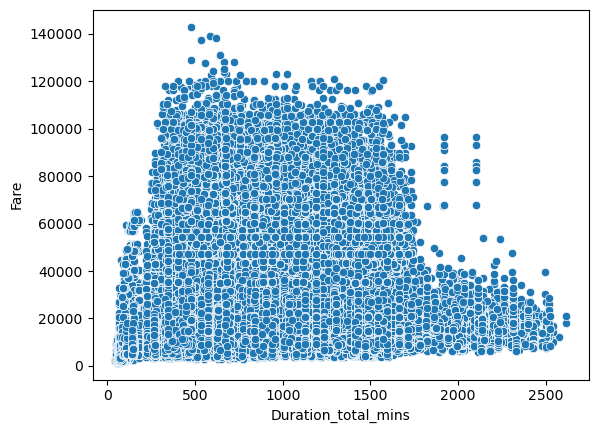

In [429]:
sns.scatterplot(x="Duration_total_mins" , y="Fare" , data=data)

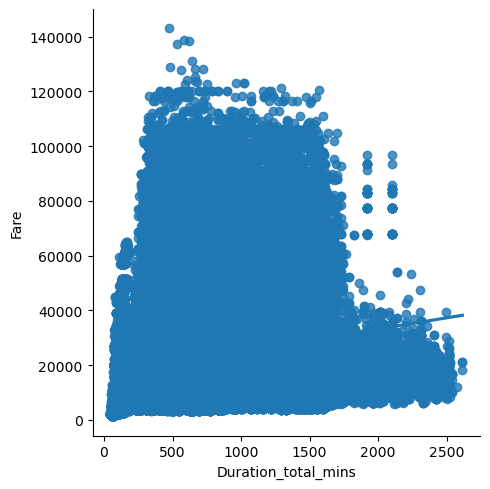

In [430]:
sns.lmplot(x="Duration_total_mins" , y="Fare" , data=data)

In [431]:
### pretty clear that As the duration of minutes increases Flight price also increases.

In [432]:
# lets understand whether total stops affect price or not !

<Axes: xlabel='Duration_total_mins', ylabel='Fare'>

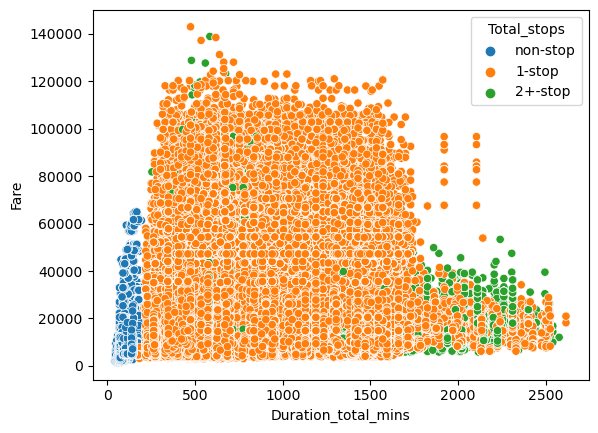

In [433]:
sns.scatterplot(x="Duration_total_mins" , y="Fare" , hue="Total_stops", data=data)

Non stops flights take less duration while their fare is also low, then as the stop increases, 
duration also increases and price also increases(in most of the cases)


# which city has maximum final destination of flights ?

In [434]:
data['Destination'].unique()

array(['Mumbai', 'Bangalore', 'Hyderabad', 'Kolkata', 'Chennai',
       'Ahmedabad', 'Delhi'], dtype=object)

In [435]:
data['Destination'].value_counts()

Destination
Mumbai       82995
Delhi        77739
Bangalore    72344
Hyderabad    62539
Chennai      57589
Kolkata      54447
Ahmedabad    44435
Name: count, dtype: int64

In [436]:
import plotly.express as px
destination_counts = data['Destination'].value_counts().reset_index()
destination_counts.columns = ['Destination', 'Count']

# Create a pie chart
fig = px.pie(destination_counts, values='Count', names='Destination', title='Distribution of Destinations')
fig.show()

# Combining Airline  And Class Feature into a new feature as Airline_Class 

In [437]:
data.columns

Index(['Date_of_journey', 'Journey_day', 'Airline', 'Flight_code', 'Class',
       'Source', 'Departure', 'Total_stops', 'Arrival', 'Destination',
       'Duration_in_hours', 'Days_left', 'Fare', 'Journey_month',
       'Journey_year', 'Duration_hours', 'Duration_mins', 'Duration_hour',
       'Duration_minute', 'Duration_total_mins'],
      dtype='object')

In [438]:
data.dtypes

Date_of_journey        datetime64[ns]
Journey_day                     int32
Airline                        object
Flight_code                    object
Class                          object
Source                         object
Departure                       int64
Total_stops                    object
Arrival                         int64
Destination                    object
Duration_in_hours              object
Days_left                       int64
Fare                            int64
Journey_month                   int32
Journey_year                    int32
Duration_hours                  int64
Duration_mins                   int64
Duration_hour                   int64
Duration_minute                 int64
Duration_total_mins             int64
dtype: object

In [439]:
data['Airline_Class'] = data['Airline'] + '_' + data['Class']

In [440]:
data['Airline_Class']

0          SpiceJet_Economy
1            Indigo_Economy
2          GO FIRST_Economy
3          SpiceJet_Economy
4         Air India_Economy
                ...        
452083     Vistara_Business
452084     Vistara_Business
452085     Vistara_Business
452086     Vistara_Business
452087     Vistara_Business
Name: Airline_Class, Length: 452088, dtype: object

In [441]:
data.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,...,Days_left,Fare,Journey_month,Journey_year,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Airline_Class
0,2023-01-16,16,SpiceJet,SG-8169,Economy,Delhi,3,non-stop,3,Mumbai,...,1,5335,1,2023,2,4,2,4,124,SpiceJet_Economy
1,2023-01-16,16,Indigo,6E-2519,Economy,Delhi,3,non-stop,4,Mumbai,...,1,5899,1,2023,2,19,2,19,139,Indigo_Economy
2,2023-01-16,16,GO FIRST,G8-354,Economy,Delhi,3,non-stop,4,Mumbai,...,1,5801,1,2023,2,10,2,10,130,GO FIRST_Economy
3,2023-01-16,16,SpiceJet,SG-8709,Economy,Delhi,3,non-stop,3,Mumbai,...,1,5794,1,2023,2,4,2,4,124,SpiceJet_Economy
4,2023-01-16,16,Air India,AI-805,Economy,Delhi,3,non-stop,3,Mumbai,...,1,5955,1,2023,2,10,2,10,130,Air India_Economy


In [442]:
data['Airline_Class'].nunique()

13

# Flight_Airline_Class and Fare comparison using box plot

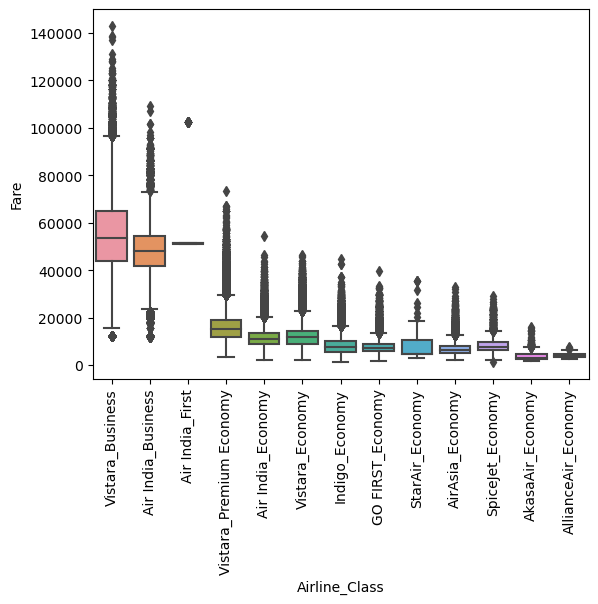

In [443]:
sns.boxplot(y='Fare' , x='Airline_Class' , data=data.sort_values('Fare' , ascending=False))
plt.xticks(rotation="vertical")
plt.show()

Conclusion--> From graph we can see that Vistara_Business have the highest Price., 
              Apart from the first, second and third Airline almost all are having similar median

# Applying one-hot Encoding on data.

In [444]:
data.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,...,Days_left,Fare,Journey_month,Journey_year,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Duration_total_mins,Airline_Class
0,2023-01-16,16,SpiceJet,SG-8169,Economy,Delhi,3,non-stop,3,Mumbai,...,1,5335,1,2023,2,4,2,4,124,SpiceJet_Economy
1,2023-01-16,16,Indigo,6E-2519,Economy,Delhi,3,non-stop,4,Mumbai,...,1,5899,1,2023,2,19,2,19,139,Indigo_Economy
2,2023-01-16,16,GO FIRST,G8-354,Economy,Delhi,3,non-stop,4,Mumbai,...,1,5801,1,2023,2,10,2,10,130,GO FIRST_Economy
3,2023-01-16,16,SpiceJet,SG-8709,Economy,Delhi,3,non-stop,3,Mumbai,...,1,5794,1,2023,2,4,2,4,124,SpiceJet_Economy
4,2023-01-16,16,Air India,AI-805,Economy,Delhi,3,non-stop,3,Mumbai,...,1,5955,1,2023,2,10,2,10,130,Air India_Economy


In [445]:
cat_col = [col for col in data.columns if data[col].dtype=="object"]

In [446]:
num_col = [col for col in data.columns if data[col].dtype!="object"]

# Handling Categorical Data
We are using 2 basic Encoding Techniques to convert Categorical data into some numerical format
Nominal data --> data are not in any order --> OneHotEncoder is used in this case
Ordinal data --> data are in order -->       LabelEncoder is used in this case

In [447]:
cat_col

['Airline',
 'Flight_code',
 'Class',
 'Source',
 'Total_stops',
 'Destination',
 'Duration_in_hours',
 'Airline_Class']

In [448]:
### Applying One-hot from scratch :

In [449]:
data['Source'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Hyderabad', 'Kolkata', 'Chennai',
       'Ahmedabad'], dtype=object)

In [450]:
data['Source'].apply(lambda x : 1 if x=='Delhi' else 0)

0         1
1         1
2         1
3         1
4         1
         ..
452083    0
452084    0
452085    0
452086    0
452087    0
Name: Source, Length: 452088, dtype: int64

In [451]:
for sub_category in data['Source'].unique():
    data['Source_'+sub_category] = data['Source'].apply(lambda x : 1 if x==sub_category else 0)

In [452]:
data.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,...,Duration_minute,Duration_total_mins,Airline_Class,Source_Delhi,Source_Mumbai,Source_Bangalore,Source_Hyderabad,Source_Kolkata,Source_Chennai,Source_Ahmedabad
0,2023-01-16,16,SpiceJet,SG-8169,Economy,Delhi,3,non-stop,3,Mumbai,...,4,124,SpiceJet_Economy,1,0,0,0,0,0,0
1,2023-01-16,16,Indigo,6E-2519,Economy,Delhi,3,non-stop,4,Mumbai,...,19,139,Indigo_Economy,1,0,0,0,0,0,0
2,2023-01-16,16,GO FIRST,G8-354,Economy,Delhi,3,non-stop,4,Mumbai,...,10,130,GO FIRST_Economy,1,0,0,0,0,0,0
3,2023-01-16,16,SpiceJet,SG-8709,Economy,Delhi,3,non-stop,3,Mumbai,...,4,124,SpiceJet_Economy,1,0,0,0,0,0,0
4,2023-01-16,16,Air India,AI-805,Economy,Delhi,3,non-stop,3,Mumbai,...,10,130,Air India_Economy,1,0,0,0,0,0,0


  # Lets Perform target guided encoding on Data
ofcourse we can use One-hot , but if we have more sub-categories , it creates curse of dimensionality
lets use Target Guided Mean Encoding in such case to get rid of curse of dimensionality..

In [453]:
cat_col

['Airline',
 'Flight_code',
 'Class',
 'Source',
 'Total_stops',
 'Destination',
 'Duration_in_hours',
 'Airline_Class']

In [454]:
data.head(3)

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,...,Duration_minute,Duration_total_mins,Airline_Class,Source_Delhi,Source_Mumbai,Source_Bangalore,Source_Hyderabad,Source_Kolkata,Source_Chennai,Source_Ahmedabad
0,2023-01-16,16,SpiceJet,SG-8169,Economy,Delhi,3,non-stop,3,Mumbai,...,4,124,SpiceJet_Economy,1,0,0,0,0,0,0
1,2023-01-16,16,Indigo,6E-2519,Economy,Delhi,3,non-stop,4,Mumbai,...,19,139,Indigo_Economy,1,0,0,0,0,0,0
2,2023-01-16,16,GO FIRST,G8-354,Economy,Delhi,3,non-stop,4,Mumbai,...,10,130,GO FIRST_Economy,1,0,0,0,0,0,0


In [455]:
data['Airline_Class'].nunique()

13

In [456]:
data.groupby(['Airline_Class'])['Fare'].mean().sort_values()

Airline_Class
AkasaAir_Economy            3570.034529
AllianceAir_Economy         4077.501272
AirAsia_Economy             7092.265922
GO FIRST_Economy            8015.075005
SpiceJet_Economy            8109.773154
Indigo_Economy              8198.754809
StarAir_Economy             9792.774194
Air India_Economy          11302.748743
Vistara_Economy            12117.745906
Vistara_Premium Economy    16298.844589
Air India_Business         46961.687859
Vistara_Business           54969.596022
Air India_First            60731.062500
Name: Fare, dtype: float64

In [457]:
airlines = data.groupby(['Airline_Class'])['Fare'].mean().sort_values().index

In [458]:
airlines

Index(['AkasaAir_Economy', 'AllianceAir_Economy', 'AirAsia_Economy',
       'GO FIRST_Economy', 'SpiceJet_Economy', 'Indigo_Economy',
       'StarAir_Economy', 'Air India_Economy', 'Vistara_Economy',
       'Vistara_Premium Economy', 'Air India_Business', 'Vistara_Business',
       'Air India_First'],
      dtype='object', name='Airline_Class')

In [459]:
dict_airlines = {key:index for index , key in enumerate(airlines , 0)}

In [460]:
dict_airlines

{'AkasaAir_Economy': 0,
 'AllianceAir_Economy': 1,
 'AirAsia_Economy': 2,
 'GO FIRST_Economy': 3,
 'SpiceJet_Economy': 4,
 'Indigo_Economy': 5,
 'StarAir_Economy': 6,
 'Air India_Economy': 7,
 'Vistara_Economy': 8,
 'Vistara_Premium Economy': 9,
 'Air India_Business': 10,
 'Vistara_Business': 11,
 'Air India_First': 12}

In [461]:
data['Airline_Class'] = data['Airline_Class'].map(dict_airlines)

In [462]:
data['Airline_Class']

0          4
1          5
2          3
3          4
4          7
          ..
452083    11
452084    11
452085    11
452086    11
452087    11
Name: Airline_Class, Length: 452088, dtype: int64

In [463]:
data.head(3)

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,...,Duration_minute,Duration_total_mins,Airline_Class,Source_Delhi,Source_Mumbai,Source_Bangalore,Source_Hyderabad,Source_Kolkata,Source_Chennai,Source_Ahmedabad
0,2023-01-16,16,SpiceJet,SG-8169,Economy,Delhi,3,non-stop,3,Mumbai,...,4,124,4,1,0,0,0,0,0,0
1,2023-01-16,16,Indigo,6E-2519,Economy,Delhi,3,non-stop,4,Mumbai,...,19,139,5,1,0,0,0,0,0,0
2,2023-01-16,16,GO FIRST,G8-354,Economy,Delhi,3,non-stop,4,Mumbai,...,10,130,3,1,0,0,0,0,0,0


In [464]:
### now lets perform Target Guided Mean encoding on 'Destination' ..

In [465]:
data['Destination'].unique()

array(['Mumbai', 'Bangalore', 'Hyderabad', 'Kolkata', 'Chennai',
       'Ahmedabad', 'Delhi'], dtype=object)

In [466]:
dest = data.groupby(['Destination'])['Fare'].mean().sort_values().index

In [467]:
dest

Index(['Delhi', 'Ahmedabad', 'Hyderabad', 'Bangalore', 'Chennai', 'Mumbai',
       'Kolkata'],
      dtype='object', name='Destination')

In [468]:
dict_dest = {key:index for index , key in enumerate(dest , 0)}

In [469]:
dict_dest

{'Delhi': 0,
 'Ahmedabad': 1,
 'Hyderabad': 2,
 'Bangalore': 3,
 'Chennai': 4,
 'Mumbai': 5,
 'Kolkata': 6}

In [470]:
data['Destination'] = data['Destination'].map(dict_dest)

In [471]:
data['Destination']

0         5
1         5
2         5
3         5
4         5
         ..
452083    4
452084    4
452085    4
452086    4
452087    4
Name: Destination, Length: 452088, dtype: int64

In [472]:
data.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,...,Duration_minute,Duration_total_mins,Airline_Class,Source_Delhi,Source_Mumbai,Source_Bangalore,Source_Hyderabad,Source_Kolkata,Source_Chennai,Source_Ahmedabad
0,2023-01-16,16,SpiceJet,SG-8169,Economy,Delhi,3,non-stop,3,5,...,4,124,4,1,0,0,0,0,0,0
1,2023-01-16,16,Indigo,6E-2519,Economy,Delhi,3,non-stop,4,5,...,19,139,5,1,0,0,0,0,0,0
2,2023-01-16,16,GO FIRST,G8-354,Economy,Delhi,3,non-stop,4,5,...,10,130,3,1,0,0,0,0,0,0
3,2023-01-16,16,SpiceJet,SG-8709,Economy,Delhi,3,non-stop,3,5,...,4,124,4,1,0,0,0,0,0,0
4,2023-01-16,16,Air India,AI-805,Economy,Delhi,3,non-stop,3,5,...,10,130,7,1,0,0,0,0,0,0


# Perform Label(Manual) Encoding on Data

In [473]:
data['Total_stops']

0         non-stop
1         non-stop
2         non-stop
3         non-stop
4         non-stop
            ...   
452083      1-stop
452084      1-stop
452085      1-stop
452086      1-stop
452087      1-stop
Name: Total_stops, Length: 452088, dtype: object

In [474]:
data['Total_stops'].unique()

array(['non-stop', '1-stop', '2+-stop'], dtype=object)

In [475]:
# As this is case of Ordinal Categorical type we perform Label encoding from scratch !
# Here Values are assigned with corresponding key

In [476]:
stop = {'non-stop':0, '2+-stop':2, '1-stop':1}

In [477]:
data['Total_stops'] = data['Total_stops'].map(stop)

In [478]:
data['Total_stops']

0         0
1         0
2         0
3         0
4         0
         ..
452083    1
452084    1
452085    1
452086    1
452087    1
Name: Total_stops, Length: 452088, dtype: int64

# Remove Un-necessary features

In [479]:
data.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,...,Duration_minute,Duration_total_mins,Airline_Class,Source_Delhi,Source_Mumbai,Source_Bangalore,Source_Hyderabad,Source_Kolkata,Source_Chennai,Source_Ahmedabad
0,2023-01-16,16,SpiceJet,SG-8169,Economy,Delhi,3,0,3,5,...,4,124,4,1,0,0,0,0,0,0
1,2023-01-16,16,Indigo,6E-2519,Economy,Delhi,3,0,4,5,...,19,139,5,1,0,0,0,0,0,0
2,2023-01-16,16,GO FIRST,G8-354,Economy,Delhi,3,0,4,5,...,10,130,3,1,0,0,0,0,0,0
3,2023-01-16,16,SpiceJet,SG-8709,Economy,Delhi,3,0,3,5,...,4,124,4,1,0,0,0,0,0,0
4,2023-01-16,16,Air India,AI-805,Economy,Delhi,3,0,3,5,...,10,130,7,1,0,0,0,0,0,0


In [480]:
data.columns

Index(['Date_of_journey', 'Journey_day', 'Airline', 'Flight_code', 'Class',
       'Source', 'Departure', 'Total_stops', 'Arrival', 'Destination',
       'Duration_in_hours', 'Days_left', 'Fare', 'Journey_month',
       'Journey_year', 'Duration_hours', 'Duration_mins', 'Duration_hour',
       'Duration_minute', 'Duration_total_mins', 'Airline_Class',
       'Source_Delhi', 'Source_Mumbai', 'Source_Bangalore', 'Source_Hyderabad',
       'Source_Kolkata', 'Source_Chennai', 'Source_Ahmedabad'],
      dtype='object')

lets drop Date_of_Journey as well as we have already extracted "Journey_hour" , "jpuney_month" , Journey_day"..
Additional_Info contains almost 80% no_info , so we can drop this column ..
lets drop Duration_total_mins as we have already extracted "Duration_hours" & "Duration_mins"
Lets drop "Source" feature as well as we have already perform feature encoding on this Feature 
lets drop Journey_year as well , as it has constant values throughtout dataframe which is 2023..

In [482]:
data.drop(columns=['Date_of_journey' , 'Duration_total_mins' , 'Source' , 'Journey_year' , 'Journey_day' ] , axis=1 , inplace=True)

In [483]:
data.head()

,Airline,Flight_code,Class,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,...,Duration_hour,Duration_minute,Airline_Class,Source_Delhi,Source_Mumbai,Source_Bangalore,Source_Hyderabad,Source_Kolkata,Source_Chennai,Source_Ahmedabad
0,SpiceJet,SG-8169,Economy,3,0,3,5,2h 4m,1,5335,...,2,4,4,1,0,0,0,0,0,0
1,Indigo,6E-2519,Economy,3,0,4,5,2h 19m,1,5899,...,2,19,5,1,0,0,0,0,0,0
2,GO FIRST,G8-354,Economy,3,0,4,5,2h 10m,1,5801,...,2,10,3,1,0,0,0,0,0,0
3,SpiceJet,SG-8709,Economy,3,0,3,5,2h 4m,1,5794,...,2,4,4,1,0,0,0,0,0,0
4,Air India,AI-805,Economy,3,0,3,5,2h 10m,1,5955,...,2,10,7,1,0,0,0,0,0,0


In [484]:
data.columns

Index(['Airline', 'Flight_code', 'Class', 'Departure', 'Total_stops',
       'Arrival', 'Destination', 'Duration_in_hours', 'Days_left', 'Fare',
       'Journey_month', 'Duration_hours', 'Duration_mins', 'Duration_hour',
       'Duration_minute', 'Airline_Class', 'Source_Delhi', 'Source_Mumbai',
       'Source_Bangalore', 'Source_Hyderabad', 'Source_Kolkata',
       'Source_Chennai', 'Source_Ahmedabad'],
      dtype='object')

In [485]:
data.drop(columns=['Airline' , 'Flight_code' , 'Class' , 'Days_left' , 'Duration_in_hours'] , axis=1 , inplace=True)
## we can drop "Duration_in_hours" and "Days_left" feature as we have extracted "Duration hour" & "Duration Minute"..
## we can drop "Airline" , "Class" as we have combined and extracted "Airline_Class" feature
## we can drop "Flight_code" as we already have "airline_class" feature 

In [486]:
data.head()

,Departure,Total_stops,Arrival,Destination,Fare,Journey_month,Duration_hours,Duration_mins,Duration_hour,Duration_minute,Airline_Class,Source_Delhi,Source_Mumbai,Source_Bangalore,Source_Hyderabad,Source_Kolkata,Source_Chennai,Source_Ahmedabad
0,3,0,3,5,5335,1,2,4,2,4,4,1,0,0,0,0,0,0
1,3,0,4,5,5899,1,2,19,2,19,5,1,0,0,0,0,0,0
2,3,0,4,5,5801,1,2,10,2,10,3,1,0,0,0,0,0,0
3,3,0,3,5,5794,1,2,4,2,4,4,1,0,0,0,0,0,0
4,3,0,3,5,5955,1,2,10,2,10,7,1,0,0,0,0,0,0


In [487]:
data.shape

(452088, 18)

In [488]:
data.drop(columns=['Duration_hour','Duration_minute'] , axis=1 , inplace=True)

In [489]:
data.shape

(452088, 16)

In [490]:
data.columns

Index(['Departure', 'Total_stops', 'Arrival', 'Destination', 'Fare',
       'Journey_month', 'Duration_hours', 'Duration_mins', 'Airline_Class',
       'Source_Delhi', 'Source_Mumbai', 'Source_Bangalore', 'Source_Hyderabad',
       'Source_Kolkata', 'Source_Chennai', 'Source_Ahmedabad'],
      dtype='object')

# Lets Perform outlier detection !

# Here the list of data visualization plots to spot the outliers.
1. Box and whisker plot (box plot).
2. Scatter plot.
3. Histogram.
4. Distribution Plot.

In [575]:
def plot(df, col):
    fig , (ax1 , ax2 , ax3) = plt.subplots(3,1)
    
    sns.distplot(df[col] , ax=ax1)
    sns.boxplot(df[col] , ax=ax2)
    sns.distplot(df[col] , ax=ax3 , kde=False)

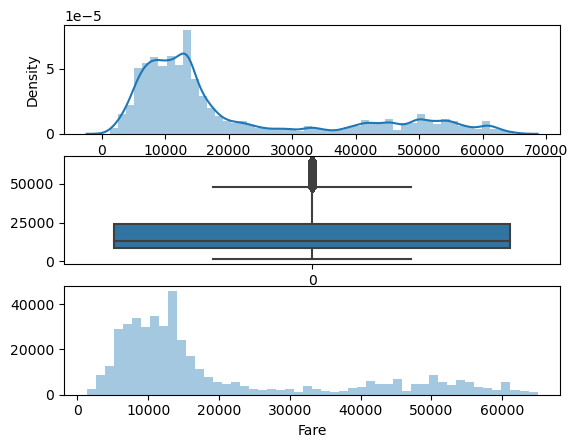

In [576]:
plot(data , 'Fare')

#  If Features Are Skewed We Use the below Technique which is IQR
    Data which are greater than IQR +1.5 IQR and data which are below than IQR - 1.5 IQR are my outliers
    where ,  IQR = 75th%ile data - 25th%ile data

     & IQR +- 1.5 IQR  will be changed depending upon the domain ie it could be sometimes IQR +- 3IQR

In [577]:
q1 = data['Fare'].quantile(0.25)
q3 = data['Fare'].quantile(0.75)

iqr = q3- q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [578]:
maximum

47748.375

In [579]:
minimum

-14628.625

In [580]:
print([price for price in data['Fare'] if price> maximum or price<minimum])

[50822.0, 50822.0, 49020.0, 49020.0, 49166.0, 52268.0, 52268.0, 51070.0, 53822.0, 52302.0, 54044.0, 54044.0, 57074.0, 57074.0, 57074.0, 57074.0, 58025.0, 58025.0, 58025.0, 58025.0, 58025.0, 56860.0, 56860.0, 56860.0, 56860.0, 56860.0, 56860.0, 56860.0, 56860.0, 56860.0, 57074.0, 57074.0, 57074.0, 57074.0, 57074.0, 57074.0, 60189.0, 58025.0, 58025.0, 58025.0, 58025.0, 62057.0, 62057.0, 62057.0, 62057.0, 62057.0, 63418.0, 51443.0, 49342.0, 50880.0, 50880.0, 49020.0, 49020.0, 49020.0, 51630.0, 51070.0, 51070.0, 54284.0, 54284.0, 54284.0, 54284.0, 54284.0, 54284.0, 54284.0, 54589.0, 57074.0, 54898.0, 54898.0, 57074.0, 58025.0, 56860.0, 56860.0, 56972.0, 57074.0, 57074.0, 57074.0, 57074.0, 57074.0, 57074.0, 59993.0, 60189.0, 61273.0, 62057.0, 62057.0, 62057.0, 62057.0, 62057.0, 63065.0, 63418.0, 51443.0, 48225.0, 48225.0, 50109.0, 48225.0, 50969.0, 49020.0, 49020.0, 49020.0, 50969.0, 53164.0, 53164.0, 53164.0, 50969.0, 50969.0, 50969.0, 50969.0, 50969.0, 50969.0, 50969.0, 50969.0, 50969.0, 

In [581]:
len([price for price in data['Fare'] if price> maximum or price<minimum])

56322

In [582]:
data['Fare'].median()

13407.0

In [583]:
data['Fare'].mean()

20019.919305533436

# How to deal with Outlier

In [584]:
### wherever I have price >65K just replace replace it with median of Price

data['Fare'] = np.where(data['Fare']>=65000 , data['Fare'].median() , data['Fare'])

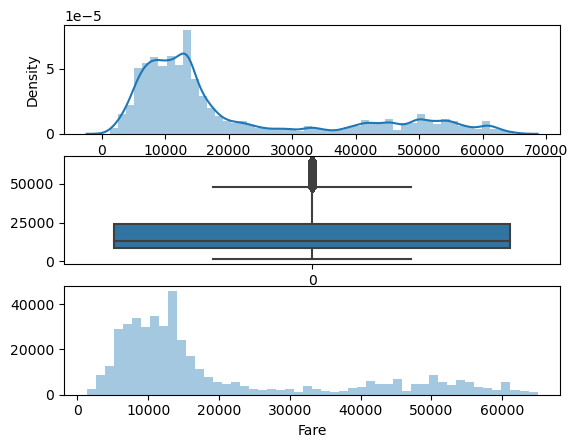

In [585]:
plot(data , 'Fare')

# Lets Perform feature selection

#     : Feature Selection
    Finding out the best feature which will contribute and have good relation with target variable.

In [502]:
X = data.drop(['Fare'] , axis=1)

In [503]:
y = data['Fare']

In [504]:
from sklearn.feature_selection import mutual_info_regression

In [505]:
imp = mutual_info_regression(X , y)

In [506]:
imp

array([0.22391199, 0.43590842, 0.22312628, 0.72834049, 0.24789211,
       0.36775099, 0.16618689, 1.07499547, 0.36172867, 0.3612747 ,
       0.35022806, 0.28621619, 0.28641687, 0.29169033, 0.24041893])

Estimate mutual information for a continuous target variable.

Mutual information between two random variables is a non-negative
value, which measures the dependency between the variables. 
If It is equal to zero it means two random variables are independent, and higher
values mean higher dependency

In [507]:
imp_df = pd.DataFrame(imp , index=X.columns)

In [508]:
imp_df.columns = ['importance']

In [509]:
imp_df

,importance
Departure,0.223912
Total_stops,0.435908
Arrival,0.223126
Destination,0.728340
Journey_month,0.247892
Duration_hours,0.367751
Duration_mins,0.166187
Airline_Class,1.074995
Source_Delhi,0.361729
Source_Mumbai,0.361275


In [510]:
imp_df.sort_values(by='importance' , ascending=False)

,importance
Airline_Class,1.074995
Destination,0.728340
Total_stops,0.435908
Duration_hours,0.367751
Source_Delhi,0.361729
Source_Mumbai,0.361275
Source_Bangalore,0.350228
Source_Chennai,0.291690
Source_Kolkata,0.286417
Source_Hyderabad,0.286216


# Lets Build ML mode

# split dataset into train & test

In [511]:
from sklearn.model_selection import train_test_split

In [512]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.25, random_state=42)

In [513]:
from sklearn.ensemble import RandomForestRegressor

In [514]:
ml_model = RandomForestRegressor()

In [515]:
ml_model.fit(X_train , y_train)

RandomForestRegressor()

In [516]:
y_pred = ml_model.predict(X_test)

In [517]:
y_pred

array([ 7984.92549559, 12413.59024817, 49576.87319671, ...,
        9565.32217407, 13640.50004762,  3380.93847301])

In [518]:
from sklearn import metrics

In [519]:
metrics.r2_score(y_test , y_pred)

0.8244901560865077

# Lets Save model
lets try to dump ml model using pickle or joblib..
advantage of dumping--
imagine in future we have new data & lets say we have to predict price on this huge data

then to do prediction on this new data , we can use this pre-trained model what we have dumped..


In [532]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [533]:
import pickle

In [534]:
file = open(r'C:\Users\Gaurav\Downloads\Fare Prediction Model\rf_random.pkl' , 'wb')

In [535]:
# dump information to that file
pickle.dump(ml_model , file)

In [536]:
model= open(r'C:\Users\Gaurav\Downloads\Fare Prediction Model\rf_random.pkl' , 'rb')

In [537]:
forest = pickle.load(model)

In [538]:
y_pred2 = forest.predict(X_test)

In [539]:
metrics.r2_score(y_test , y_pred2)

0.8244901560865077

#  automate ml pipeline & define your Evaluation metric..
 make our own metric...

In [540]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [541]:
mape(y_test , y_pred)

17.823655764383684

###  automate ml pipeline !

In [542]:
from sklearn import metrics

In [543]:
def predict(ml_model):
    model = ml_model.fit(X_train , y_train)
    print('Training score : {}'.format(model.score(X_train , y_train)))
    y_predection = model.predict(X_test)
    print('predictions are : {}'.format(y_predection))
    print('\n')
    r2_score = metrics.r2_score(y_test , y_predection)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test , y_predection)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test , y_predection)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test , y_predection))))
    print('MAPE : {}'.format(mape(y_test , y_predection)))
    sns.distplot(y_test - y_predection)

Training score : 0.8540525823694409
predictions are : [ 7771.05519543 12329.01471734 49122.80047259 ...  9664.93439672
 13633.03188095  3368.67853701]


r2 score : 0.8244375911455128
MAE : 3160.5057649558794
MSE : 47946936.59148908
RMSE : 6924.37264966936
MAPE : 17.837220866662012


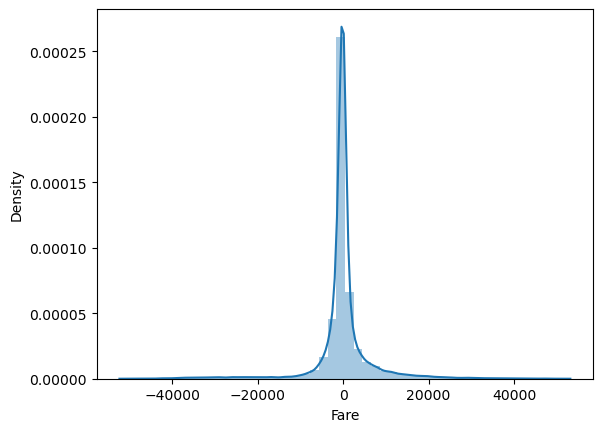

In [544]:
predict(RandomForestRegressor())

In [545]:
from sklearn.tree import DecisionTreeRegressor


Training score : 0.8545537470450126
predictions are : [ 7946.55555556 12307.11111111 49212.         ...  9263.
 13678.33333333  3377.83333333]


r2 score : 0.8219109893364497
MAE : 3166.3497041088413
MSE : 48636963.67371885
RMSE : 6974.0206246984135
MAPE : 17.84769307312865


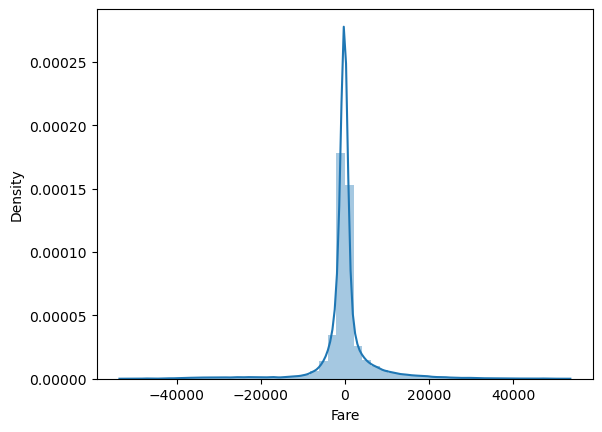

In [546]:
predict(DecisionTreeRegressor())

# how to hypertune ml model

In [586]:
## Will use Multiple Algos,then go for Hyper-parameter Optimization,then for Cross Validation then go for various metrics & based on domain expertise knowledge Then I can say ya this model perfoms best !

# Hyperparameter Tuning or Hyperparameter Optimization
1.Choose following method for hyperparameter tuning
    a.RandomizedSearchCV --> Fast way to Hypertune model
    b.GridSearchCV--> Slower way to hypertune my model
2.Choose ML algo that u have to hypertune
2.Assign hyperparameters in form of dictionary or create hyper-parameter space
3.define searching &  apply searching on Training data or  Fit the CV model 
4.Check best parameters and best score

In [550]:
from sklearn.model_selection import RandomizedSearchCV

In [551]:
### initialise your estimator
reg_rf = RandomForestRegressor()

In [552]:
np.linspace(start =100 , stop=1200 , num=6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [553]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100 , stop=1200 , num=6)]

# Number of features to consider at every split
max_features = ["auto", "sqrt"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start =5 , stop=30 , num=4)]

# Minimum number of samples required to split a node
min_samples_split = [5,10,15,100]


In [554]:
# Create the random grid or hyper-parameter space

random_grid = {
    'n_estimators' : n_estimators , 
    'max_features' : max_features , 
    'max_depth' : max_depth , 
    'min_samples_split' : min_samples_split
}

In [555]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [556]:
# Define searching

# Random search of parameters, using 3 fold cross validation


rf_random = RandomizedSearchCV(estimator=reg_rf , param_distributions=random_grid , cv=3 , n_jobs=-1 , verbose=2)

In [557]:
rf_random.fit(X_train , y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [558]:
rf_random.best_params_

{'n_estimators': 320,
 'min_samples_split': 15,
 'max_features': 'sqrt',
 'max_depth': 21}

In [559]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=21, max_features='sqrt', min_samples_split=15,
                      n_estimators=320)

In [560]:
rf_random.best_score_

0.8210986687833671